In [1]:
import pandas as pd
from collections import Counter

In [67]:
import os
import random
import numpy as np
import pickle
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
def normalizeTargets(i,file):
    ratefile =  os.path.join(file,file+"_rate.npy")
    
    nTargets_1 =np.load(ratefile)
    
    ratefile_train =  os.path.join('train','train'+"_rate.npy")
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)
    
    norm = 'zscore'

    if(norm == 'zscore'):
        nTargets =nTargets_1- mean
        nTargets = np.divide(nTargets,std,out=np.zeros_like(nTargets),where=std!=0)
        
    else:
        nTargets = -np.log(nTargets_1)

    return nTargets[i]

In [69]:
def de_normalizeTargets(error,file='train'):
    ratefile =  os.path.join(file,file+"_rate.npy")

    nTargets_1 =np.load(ratefile)

    ratefile_train =  os.path.join('train','train'+"_rate.npy")
    
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)


    erro = np.dot(error,std)+mean

    '''
    erro = np.exp(-error)
    '''
    return erro

In [70]:
def SNP_WINDOW(w,r,i,file):
 
    respectiveNormalizedTargets = [normalizeTargets(i,file)]
    targets = np.array(respectiveNormalizedTargets)
    lis=[]

    for i in w:
        co = dict(Counter(i))
        if len(co.keys())==2:
            lis.append(co[min(co,key=co.get)]/len(i))
    bins = np.linspace(0, 1, 20)

    bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
    bins= bins[1:]
    bin_means= bin_means/bin_means.sum()
    

    
    

    return np.array(bins),np.array(targets),bin_means

In [71]:
def break_window(ha,po,ra,winsize):
    print(len(ha))
    bins = np.linspace(0, len(ha),winsize)

    bin_means,bins = np.histogram(ha, bins)
    print(bin_means)

In [72]:
def __data_generation1(batchTreeIndices,file):

        haps = []
        pos = []
        rate =[]
        for treeIndex in batchTreeIndices:
            Hfilepath = os.path.join(file,str(treeIndex) + "_haps.npy")
            Pfilepath = os.path.join(file, str(treeIndex) +"_pos.npy")
            H = np.load(Hfilepath)
            P = np.load(Pfilepath)

            haps.append(H)
            pos.append(P)

        return haps,pos


            
def __getitem__1(idx,val):
    X,x1= __data_generation1([idx],val)
    return X,x1

In [73]:
lis_train=[]
train_=[]
for i in range(1000):
    x,pos= __getitem__1(i,'train')
    
    if len(pos[0])>0:
        vale2,targets,vale1 = SNP_WINDOW(x[0],pos[0],i,'train')

        lis_train.append(vale1)
        #lis_train.append(len(pos[0]))
        train_.append(targets[0])



/tmp/ipykernel_63524/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [74]:
lis_test=[]
test_=[]
for i in range(50):
    x,pos= __getitem__1(i,'test')
    if len(pos[0])>0:
        vale2,targets,vale1 = SNP_WINDOW(x[0],pos[0],i,'test')
        lis_test.append(vale1)
        #lis_test.append(len(pos[0]))
        test_.append(targets[0])
    


/tmp/ipykernel_63524/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [75]:
vali_x=[]
vali_y=[]
for i in range(500):
    x,pos= __getitem__1(i,'validation')

    if len(pos[0])>0:
        vale2,targets,vale1 = SNP_WINDOW(x[0],pos[0],i,'validation')

        vali_x.append(vale1)
        #vali_x.append(len(pos[0]))
        vali_y.append(targets[0])



/tmp/ipykernel_63524/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [76]:
Haps,Pos = __getitem__1(0,'train')

In [77]:
# len(Pos[0])

In [78]:
Pos[0]

array([  62.228672,   86.575905,   91.161026,  436.9068  ,  512.6168  ,
        543.7537  ,  560.44977 ,  560.77045 ,  568.4887  ,  699.4387  ,
        899.0491  ,  900.444   , 1032.1564  , 1234.6888  , 1322.9974  ,
       1383.883   , 1384.855   , 1873.0293  , 1958.2362  , 2001.5453  ,
       2012.9316  , 2127.7693  , 2336.3848  , 2400.9158  , 2404.4448  ,
       2490.8672  , 2510.3438  , 2530.7346  , 2595.7378  , 2600.3704  ,
       2847.0786  , 2934.4084  , 2958.7698  , 2992.9387  , 3012.4766  ,
       3105.0742  , 3105.083   , 3286.3535  , 3730.6492  , 3862.3486  ,
       4114.5664  , 4216.6245  , 4239.153   , 4372.979   , 4404.03    ,
       4532.5645  , 4606.509   , 4800.3022  , 4839.803   , 5012.8047  ,
       5170.862   , 5273.669   , 5324.005   , 5386.0938  , 5419.1724  ,
       5485.2515  , 5686.4663  , 5711.1406  , 5763.2627  , 5844.549   ,
       6011.6978  , 6029.4575  , 6264.479   , 6290.0107  , 6427.1904  ,
       6509.666   , 6583.4683  , 6680.128   , 6705.524   , 6743.

In [79]:
_,target,feature =SNP_WINDOW(Haps[0],Pos[0],0,'train')

/tmp/ipykernel_63524/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [80]:
target

array([-1.71207203])

In [81]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(
    #objective = 'reg:linear',
    
    objective = 'reg:squarederror',
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 6,
    min_child_weight = 1,
    n_estimators = 1000,
    subsample = 0.7
)

In [82]:
#xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 2500, seed = 123)

In [83]:
fd= pd.DataFrame(np.stack(lis_train,axis=1)).T
#fd= pd.DataFrame(lis_train)

In [84]:
fd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.292929,0.111111,0.080808,0.090909,0.101010,0.060606,0.131313,0.080808,0.030303,0.020202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.323529,0.205882,0.088235,0.088235,0.039216,0.088235,0.039216,0.049020,0.029412,0.049020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.320388,0.145631,0.106796,0.058252,0.087379,0.067961,0.067961,0.038835,0.077670,0.029126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.202247,0.134831,0.123596,0.101124,0.101124,0.123596,0.067416,0.078652,0.033708,0.033708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.363636,0.172727,0.072727,0.118182,0.027273,0.054545,0.036364,0.054545,0.063636,0.036364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.263158,0.219298,0.131579,0.052632,0.043860,0.052632,0.043860,0.070175,0.043860,0.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.270000,0.190000,0.170000,0.070000,0.070000,0.080000,0.060000,0.030000,0.050000,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.265060,0.168675,0.072289,0.060241,0.108434,0.108434,0.084337,0.084337,0.024096,0.024096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.311111,0.155556,0.044444,0.111111,0.111111,0.033333,0.044444,0.077778,0.088889,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
target =pd.DataFrame(train_,columns=['target'])

In [86]:
target

,target
0,-1.712072
1,0.642617
2,1.308123
3,-1.151981
4,1.089646
...,...
995,-1.334399
996,-1.094373
997,0.782895
998,0.209830


In [87]:
xgb_r.fit(fd,target)
#pred = xgb_r.predict(np.vstack(feature))



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
#pred = xgb_r.predict(pd.DataFrame(np.stack(lis_test,axis=1)).T)

pred = xgb_r.predict(pd.DataFrame(vali_x))

In [89]:
pred_df =pd.DataFrame(de_normalizeTargets(pred,'validation'))

In [90]:
pred_df

,0
0,6.005902e-07
1,3.791909e-07
2,6.377286e-07
3,6.516443e-07
4,6.136562e-07
...,...
495,6.248007e-07
496,6.075044e-07
497,4.997273e-07
498,4.413046e-07


In [91]:
true_df = pd.DataFrame(de_normalizeTargets(np.array(vali_y),'validation'))

In [92]:
true_df

,0
0,6.755989e-07
1,8.491505e-07
2,5.001767e-07
3,4.164871e-07
4,1.642206e-07
...,...
495,1.544302e-07
496,4.130613e-07
497,1.741429e-07
498,4.913616e-07


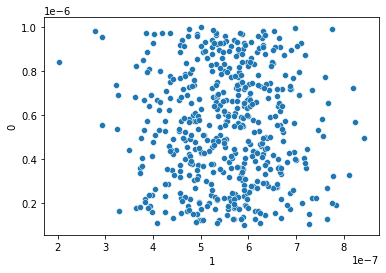

In [93]:
(pred_df-true_df)

import seaborn as sns


frames = [true_df, pred_df]


result =pd.concat([true_df,pred_df.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

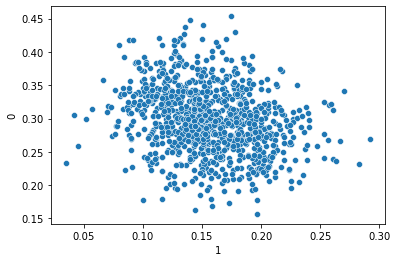

In [94]:

plt.clf()
result =pd.concat([fd,pd.DataFrame(de_normalizeTargets(train_,'train')).rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()


In [95]:
from scipy.stats import spearmanr
rho, p = spearmanr(true_df,pred_df)


In [96]:
rho

-0.0004435217953762282

In [97]:
p

0.9921069542863894

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
mod = LinearRegression().fit(fd,target)

In [100]:
mod.score(fd,target)

0.01502258912166965

In [101]:
#pred_df =pd.DataFrame(de_normalizeTargets(mod.predict(pd.DataFrame(np.stack(vali_x,axis=1)).T),'validation'))
pred_df =pd.DataFrame(de_normalizeTargets(mod.predict(pd.DataFrame(vali_x)),'validation'))

In [102]:
pred_df

,0
0,6.928460e-07
1,6.602890e-07
2,5.626180e-07
3,4.649471e-07
4,6.277320e-07
...,...
495,5.626180e-07
496,6.277320e-07
497,5.626180e-07
498,5.300610e-07


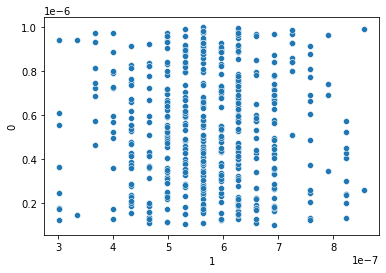

In [103]:
(pred_df-true_df)

import seaborn as sns


frames = [true_df, pred_df]


result =pd.concat([true_df,pred_df.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [104]:
result

,0,1
0,6.755989e-07,6.928460e-07
1,8.491505e-07,6.602890e-07
2,5.001767e-07,5.626180e-07
3,4.164871e-07,4.649471e-07
4,1.642206e-07,6.277320e-07
...,...,...
495,1.544302e-07,5.626180e-07
496,4.130613e-07,6.277320e-07
497,1.741429e-07,5.626180e-07
498,4.913616e-07,5.300610e-07


In [105]:
from scipy.stats import spearmanr
rho, p = spearmanr(pred_df,true_df)


In [106]:
rho

-0.011981062311737057

In [107]:
p

0.7892814879644657